K-Means Clustering with Scikit-Learn
-----------------------------------------------------

K-means clustering is one of the most widely used unsupervised machine learning algorithms that forms clusters of data based on the similarity between data instances. For this particular algorithm to work, the number of clusters has to be defined beforehand. The K in the K-means refers to the number of clusters.

The K-means algorithm starts by randomly choosing a centroid value for each cluster. After that the algorithm iteratively performs three steps: 

(i) Find the Euclidean distance between each data instance and centroids of all the clusters; 

(ii) Assign the data instances to the cluster of the centroid with nearest distance; 

(iii) Calculate new centroid values based on the mean values of the coordinates of all the data instances from the corresponding cluster.

A Simple Example
--------------------------
Let's try to see how the K-means algorithm works with the help of a handcrafted example, before implementing the algorithm in Scikit-Learn.

We have a set of the following two dimensional data instances named D.

In [ ]:
D = { (5,3), (10,15), (15,12), (24,10), (30,45), (85,70), (71,80), (60,78), (55,52), (80,91) }  

# We want to divide this data into two clusters, 
# C1 and C2 based on the similarity between the data points.

The first step is to randomly initialize values for the centroids of both clusters. Let's name centroids of clusters C1 and C2 as c1 and c2 and initialize them with the values of the first two data points 
i.e. (5, 3) and (10, 15).

![Iteration_1_K_means_algo](Iteration_1_K_means_algo.png 'Iteration_1_K_means_algo')

After assigning data points to the corresponding clusters, the next step is to calculate the new centroid values. These values are calculated by finding the means of the coordinates of the data points that belong to a particular cluster.

For cluster C1, there is currently only one point i.e. (5,3), therefore the mean of the coordinates remain same and the new centroid value for c1 will also be (5,3).

For C2, there are currently 9 data points. We name the coordinates of data points as x and y. The new value for x coordinate of centroid c2 can be calculated by determining the mean of x coordinates of all 9 points that belong to cluster C2 as given below:

c2(x) = (10 + 15 + 24 + 30 + 85 + 71 + 60 + 55 + 80) / 9 = 47.77  
The new value for y coordinate of centroid c2 can be calculated by determining the mean of all y coordinates of all 9 points that belong to cluster C2.

c2(y) = (15 + 12 + 10 + 45 + 70 + 80 + 78 + 52 + 91) / 9 = 50.33  

**The updated centroid value for c2 will now be {47.77, 50.33}.

For the next iteration, the new centroid values for c1 and c2 will be used and the whole process will be repeated. The iterations continue until the centroid values stop updating.

![Iteration_2_K_means_algo](Iteration_2_K_means_algo.png 'Iteration_2_K_means_algo')

c1(x) = (5, 10, 15, 24) / 4 = 13.5  
c1(y) = (3, 15, 12, 10) / 4 = 10.0 
**Updated c1 to be (13.5, 10.0).

c2(x) = (30 + 85 + 71 + 60 + 55 + 80) / 6 = 63.5  
c2(y) = (45 + 70 + 80 + 78 + 52 +91) / 6 = 69.33  
**Updated c2 to be (63.5, 69.33).

![Iteration_3_K_means_algo](Iteration_3_K_means_algo.png 'Iteration_3_K_means_algo')

c1(x) = (5, 10, 15, 24, 30) / 5 = 16.8  
c1(y) = (3, 15, 12, 10, 45) / 5 = 17.0  
**Updated c1 to be (16.8, 17.0).

c2(x) = (85 + 71 + 60 + 55 + 80) / 5 = 70.2  
c2(y) = (70 + 80 + 78 + 52 + 91) / 5 = 74.2  
**Updated c2 to be (70.2, 74.2).

![Iteration_4_K_means_algo](Iteration_4_K_means_algo.png 'Iteration_4_K_means_algo')

At the end of fourth iteration, the updated values of C1 and C2 are same as they were at the end of the third iteration. This means that data cannot be clustered any further. c1 and c2 are the centroids for C1 and C2. To classify a new data point, the distance between the data point and the centroids of the clusters is calculated. Data point is assigned to the cluster whose centroid is closest to the data point.

K-means Clustering with Scikit-Learn
-----------------------------------------------------
Now that we know how the K-means clustering algorithm actually works, let's see how we can implement it with Scikit-Learn.

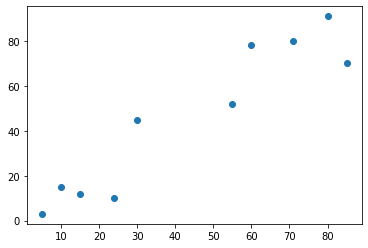

In [1]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  

# prepare the data that we want to cluster
X = np.array([
     [5, 3],  
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

# Visualize the Data  .. type your code.. 
plt.scatter(X[:,0],X[:,1], label='True Position')
plt.show()


In [2]:
from sklearn.cluster import KMeans  

# Create Clusters. Assume with no. of clusters = 2
kmeans = KMeans(n_clusters=2)  
kmeans.fit(X)  

# see what centroid values the algorithm generated for the final clusters 
print(kmeans.cluster_centers_)  

[[70.2 74.2]
 [16.8 17. ]]


Here the first row contains values for the coordinates of the first centroid i.e. (16.8 , 17) and the second row contains values for the coordinates of the other centroid i.e. (70.2, 74.2). You can see that these values are similar to what we calculated manually for centroids c1 and c2 in the last section.

In [3]:
print(X)

# To see the labels for the data point, -> use labels_ attribute
print(kmeans.labels_)


# The output is a one dimensional array of 10 elements corresponding 
# to the clusters assigned to our 10 data points.

[[ 5  3]
 [10 15]
 [15 12]
 [24 10]
 [30 45]
 [85 70]
 [71 80]
 [60 78]
 [55 52]
 [80 91]]
[1 1 1 1 1 0 0 0 0 0]


Here the first five points have been clustered together and the last five points have been clustered. Here 0 and 1 are merely used to represent cluster IDs and have no mathematical significance.

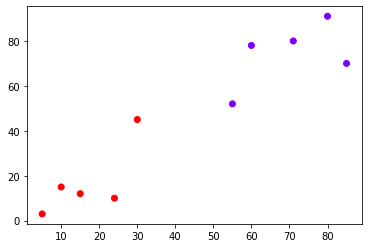

In [5]:
# Let's plot the data points again on the graph and 
# visualize how the data has been clustered.

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.show()

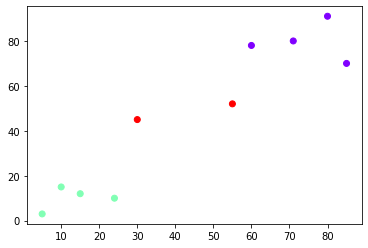

In [6]:
# execute K-means algorithm with three clusters and see the output graph
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

In [7]:
kmeans.cluster_centers_

array([[74.  , 79.75],
       [13.5 , 10.  ],
       [42.5 , 48.5 ]])

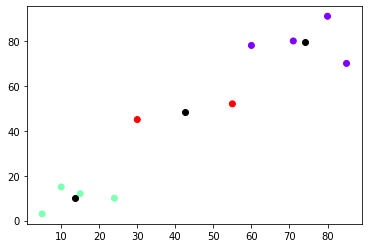

In [8]:
# let's plot the points along with the centroid coordinates 
# of each cluster to see how the centroid positions effects clustering.

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

Recommended Reading 
-----------------------------------

Clustering with Gaussian Mixture Models
-----------------------------------------------------------

Clustering is an essential part of any data analysis. Using an algorithm such as K-Means leads to hard assignments, meaning that each point is definitively assigned a cluster center. This leads to some interesting problems: what if the true clusters actually overlap? What about data that is more spread out; how do we assign clusters then?

For further reading of concepts related to Expectation-Maximization Algorithm and GMM, please see this blog article.
https://pythonmachinelearning.pro/clustering-with-gaussian-mixture-models/

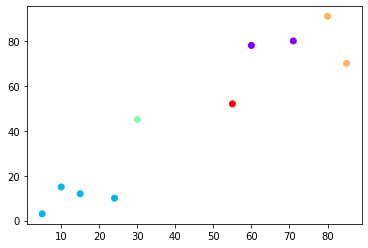

In [9]:
# execute K-means algorithm with five clusters and see the output graph
kmeans = KMeans(n_clusters=5)  
kmeans.fit(X)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

In [10]:
kmeans.cluster_centers_

array([[65.5, 79. ],
       [13.5, 10. ],
       [30. , 45. ],
       [82.5, 80.5],
       [55. , 52. ]])

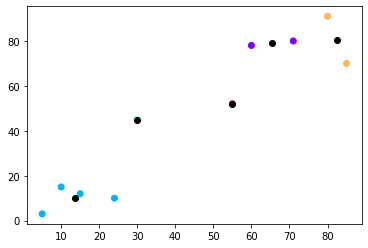

In [11]:
# let's plot the points along with the centroid coordinates 
# of each cluster to see how the centroid positions effects clustering.

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

# Project: Customer Segmentation on a shopping mall data using Unsupervised ML algorithm - K-Means Clustering

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/BK_Birla/main/Mall_Customers.csv")
df.shape

(200, 5)

In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [18]:
df.Gender.value_counts(normalize=True)*100

Female    56.0
Male      44.0
Name: Gender, dtype: float64

In [19]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.iloc[ : , [3,4] ].columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [25]:
X = df.iloc[ : , [3,4] ].values

In [26]:
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

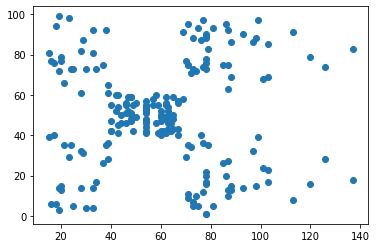

In [27]:
plt.scatter(X[:,0], X[:,1])
plt.show();

In [28]:
X1 = df.iloc[:,[3,4]]
X1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Hopkin's Statistics

How different is your data from randomly scattered distribution.

In [29]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [30]:
hopkins(X1)

0.8205975980577503

In [55]:
hopkins(X1)

0.8027228055016435

In [31]:
l = []
for i in range(1000):
    l.append(hopkins(X1))

In [56]:
np.mean(l)

0.763287278621917

In [57]:
from sklearn.cluster import KMeans

In [58]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [59]:
kmeans.cluster_centers_

array([[60.37735849, 30.5754717 ],
       [60.76595745, 72.32978723]])

In [60]:
kmeans.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

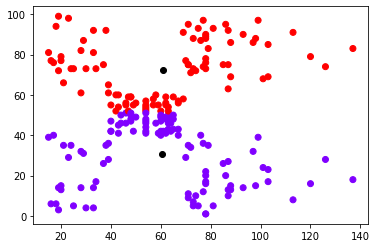

In [61]:
# let's plot the points along with the centroid coordinates 
# of each cluster to see how the centroid positions effects clustering.

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

In [63]:
from sklearn.cluster import KMeans

In [64]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [65]:
kmeans.cluster_centers_

array([[44.15447154, 49.82926829],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513]])

In [66]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

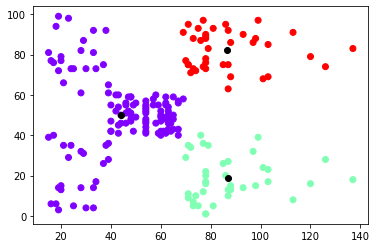

In [67]:
# let's plot the points along with the centroid coordinates 
# of each cluster to see how the centroid positions effects clustering.

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

# Elbow method

In [68]:
from sklearn.cluster import KMeans
wcss = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)

[183069.17582751295, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37265.86520484345, 30273.394312070028, 25022.485004530332, 22206.986019376236, 19794.559507517566]


In [69]:
len(wcss)

9

In [70]:
avg = sum(wcss)/len(wcss)
avg

60234.342602820434

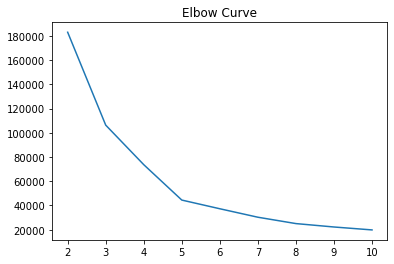

In [71]:
plt.plot(range(2,11),wcss)
plt.title("Elbow Curve")
plt.show()

In [72]:
from sklearn.cluster import KMeans

In [73]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [74]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

In [75]:
kmeans.labels_

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

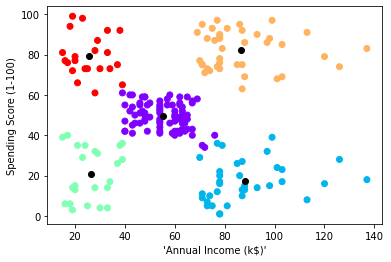

In [78]:
# let's plot the points along with the centroid coordinates 
# of each cluster to see how the centroid positions effects clustering.

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 
plt.xlabel("'Annual Income (k$)'")
plt.ylabel('Spending Score (1-100)')
plt.show()

From this plot we can see 5 clusters are the best choice for the dataset which was determined using elbow method.